**$H_3$ Molecule with Hartree Fock Initialization:**

In [ ]:
pip install pennylane --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 kB 524.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 930.8/930.8 kB 44.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 58.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 67.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.9/167.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 41.9 MB/s eta 0:00:00


In [ ]:
pip install geometric --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.0/386.0 kB 1.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
pip install --upgrade pyscf --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 MB 10.5 MB/s eta 0:00:00


# Initial Geometry Hartree Fock Calculations

In [ ]:
from pyscf import gto, scf
import numpy as np

I found the initial coordinates considering the molecular geometry is an equilateral triangle (every angle is 60 degrees) with side length = $0.88 Å$.

In [ ]:
from pyscf import gto, scf
from pyscf.geomopt import geometric_solver  # Internal optimizer
from pyscf.geomopt.geometric_solver import optimize


# Defining initial geometry
# Equilateral triangle geometry for H3+ (side length = 0.88 Å)
mol = gto.M(
    atom='''
    H  0.000   0.000   0.0
    H  0.000   0.880   0.0
    H  0.440   0.762   0.0  # x=0.88*cos(60°), y=0.88*sin(60°)
    ''',
    basis='sto-3g',
    charge=1,  # H3+ has +1 charge
    unit='angstrom')

# Run HF calculation
mf = scf.RHF(mol).run()
print("Initial HF energy:", mf.e_tot)

# Optimize geometry
mol_optimized = geometric_solver.optimize(mf)
print("Optimized coordinates:", mol_optimized.atom_coords())

# Get final energy
mf_optimized = scf.RHF(mol_optimized).run()
print("Optimized HF energy:", mf_optimized.e_tot)

converged SCF energy = -1.01957463130476


geometric-optimize called with the following command line:
/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py -f /root/.local/share/jupyter/runtime/kernel-12f71143-8458-4ceb-962f-9e31d03c2879.json

                                        ())))))))))))))))/                     
                                    ())))))))))))))))))))))))),                
                                *)))))))))))))))))))))))))))))))))             
                        #,    ()))))))))/                .)))))))))),          
                      #%%%%,  ())))))                        .))))))))*        
                      *%%%%%%,  ))              ..              ,))))))).      
                        *%%%%%%,         ***************/.        .)))))))     
                #%%/      (%%%%%%,    /*********************.       )))))))    
              .%%%%%%#      *%%%%%%,  *******/,     **********,      .))))))   
                .%%%%%%/      *%%%%%%,  **              ********    

Initial HF energy: -1.019574631304765

Geometry optimization cycle 1
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000000   0.000000   0.000000    0.000000  0.000000  0.000000
   H   0.000000   0.880000   0.000000    0.000000  0.000000  0.000000
   H   0.440000   0.762000   0.000000    0.000000  0.000000  0.000000
converged SCF energy = -1.0195746313049
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H     0.0265485252     0.0990384341     0.0000000000
1 H     0.7909352898    -0.2651756796     0.0000000000
2 H    -0.8174838150     0.1661372455     0.0000000000
----------------------------------------------
cycle 1: E = -1.0195746313  dE = -1.01957  norm(grad) = 1.18418


Step    0 : Gradient = 6.837e-01/8.342e-01 (rms/max) Energy = -1.0195746313
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.00000e-01 8.70211e-01



Geometry optimization cycle 2
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.009064  -0.033822  -0.000000   -0.009064 -0.033822 -0.000000
   H  -0.109596   0.927517  -0.000000   -0.109596  0.047517 -0.000000
   H   0.558660   0.748305  -0.000000    0.118660 -0.013695 -0.000000
converged SCF energy = -1.21443369707476
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H     0.0053002270     0.0197345244    -0.0000000000
1 H     0.1614384617    -0.0538566820    -0.0000000000
2 H    -0.1667386886     0.0341221576     0.0000000000
----------------------------------------------
cycle 2: E = -1.21443369707  dE = -0.194859  norm(grad) = 0.24155


Step    1 : Displace = 9.960e-02/1.195e-01 (rms/max) Trust = 1.000e-01 (=) Grad = 1.395e-01/1.702e-01 (rms/max) E (change) = -1.2144336971 (-1.949e-01) Quality = 0.791
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.03213e-01 9.67730e-01



Geometry optimization cycle 3
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.015748  -0.058702  -0.000000   -0.006685 -0.024880 -0.000000
   H  -0.136729   0.948097  -0.000000   -0.027132  0.020580  0.000000
   H   0.592477   0.752605  -0.000000    0.033817  0.004300  0.000000
converged SCF energy = -1.2305879830112
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0016921466    -0.0063297095    -0.0000000000
1 H     0.0947984144    -0.0220175149     0.0000000000
2 H    -0.0931062678     0.0283472244     0.0000000000
----------------------------------------------
cycle 3: E = -1.23058798301  dE = -0.0161543  norm(grad) = 0.137793


Step    2 : Displace = 3.155e-02/3.409e-02 (rms/max) Trust = 1.414e-01 (+) Grad = 7.955e-02/9.733e-02 (rms/max) E (change) = -1.2305879830 (-1.615e-02) Quality = 1.494
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 1.00000e-01 1.24000e-01 3.88353e-01



Geometry optimization cycle 4
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.008194  -0.030400  -0.000000    0.007554  0.028302  0.000000
   H  -0.188265   0.946698  -0.000000   -0.051536 -0.001399 -0.000000
   H   0.636459   0.725702  -0.000000    0.043982 -0.026903 -0.000000
converged SCF energy = -1.24306812098916
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0014241761    -0.0052931962     0.0000000000
1 H     0.0360900206    -0.0068390184     0.0000000000
2 H    -0.0346658444     0.0121322146    -0.0000000000
----------------------------------------------
cycle 4: E = -1.24306812099  dE = -0.0124801  norm(grad) = 0.0522324


Step    3 : Displace = 4.537e-02/5.156e-02 (rms/max) Trust = 2.000e-01 (+) Grad = 3.016e-02/3.673e-02 (rms/max) E (change) = -1.2430681210 (-1.248e-02) Quality = 1.319
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 9.99999e-02 1.10548e-01 2.69371e-01



Geometry optimization cycle 5
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H  -0.002485  -0.009061   0.000000    0.005710  0.021339  0.000000
   H  -0.219689   0.943675  -0.000000   -0.031424 -0.003023  0.000000
   H   0.662174   0.707387  -0.000000    0.025715 -0.018315  0.000000
converged SCF energy = -1.24610005593287
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0004828211    -0.0017648147     0.0000000000
1 H     0.0145246071    -0.0029538698    -0.0000000000
2 H    -0.0140417861     0.0047186845    -0.0000000000
----------------------------------------------
cycle 5: E = -1.24610005593  dE = -0.00303193  norm(grad) = 0.0210351


Step    4 : Displace = 2.876e-02/3.157e-02 (rms/max) Trust = 2.828e-01 (+) Grad = 1.214e-02/1.482e-02 (rms/max) E (change) = -1.2461000559 (-3.032e-03) Quality = 1.355
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 8.90406e-02 1.00000e-01 2.03617e-01



Geometry optimization cycle 6
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.000855   0.003361   0.000000    0.003340  0.012422  0.000000
   H  -0.239667   0.942394  -0.000000   -0.019978 -0.001281  0.000000
   H   0.678812   0.696245  -0.000000    0.016638 -0.011141  0.000000
converged SCF energy = -1.24679813351587
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0000814256    -0.0002863761     0.0000000000
1 H     0.0039170455    -0.0008997955     0.0000000000
2 H    -0.0038356199     0.0011861716    -0.0000000000
----------------------------------------------
cycle 6: E = -1.24679813352  dE = -0.000698078  norm(grad) = 0.00568863


Step    5 : Displace = 1.796e-02/2.003e-02 (rms/max) Trust = 3.000e-01 (+) Grad = 3.284e-03/4.019e-03 (rms/max) E (change) = -1.2467981335 (-6.981e-04) Quality = 1.233
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 7.36093e-02 1.00000e-01 1.81717e-01



Geometry optimization cycle 7
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.001936   0.007364   0.000000    0.001081  0.004003  0.000000
   H  -0.246722   0.942155  -0.000000   -0.007055 -0.000239  0.000000
   H   0.684787   0.692481  -0.000000    0.005975 -0.003764  0.000000
converged SCF energy = -1.24685851775877
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0000143197    -0.0000518011     0.0000000000
1 H     0.0005893913    -0.0001305338    -0.0000000000
2 H    -0.0005750717     0.0001823349    -0.0000000000
----------------------------------------------
cycle 7: E = -1.24685851776  dE = -6.03842e-05  norm(grad) = 0.000855139


Step    6 : Displace = 6.242e-03/7.063e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 4.937e-04/6.037e-04 (rms/max) E (change) = -1.2468585178 (-6.038e-05) Quality = 1.139
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.51112e-02 1.00000e-01 1.74473e-01



Geometry optimization cycle 8
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.002130   0.008087   0.000000    0.000195  0.000723  0.000000
   H  -0.247973   0.942104  -0.000000   -0.001251 -0.000050  0.000000
   H   0.685842   0.691809  -0.000000    0.001056 -0.000673  0.000000
converged SCF energy = -1.24686000267813
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H    -0.0000005556    -0.0000025319     0.0000000000
1 H     0.0000290907    -0.0000063503    -0.0000000000
2 H    -0.0000285351     0.0000088822    -0.0000000000
----------------------------------------------
cycle 8: E = -1.24686000268  dE = -1.48492e-06  norm(grad) = 4.22666e-05


Step    7 : Displace = 1.110e-03/1.252e-03 (rms/max) Trust = 3.000e-01 (=) Grad = 2.440e-05/2.989e-05 (rms/max) E (change) = -1.2468600027 (-1.485e-06) Quality = 1.047
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.25550e-02 1.00000e-01 1.72640e-01



Geometry optimization cycle 9
Cartesian coordinates (Angstrom)
 Atom        New coordinates             dX        dY        dZ
   H   0.002140   0.008125   0.000000    0.000010  0.000037  0.000000
   H  -0.248038   0.942101  -0.000000   -0.000065 -0.000003  0.000000
   H   0.685897   0.691774  -0.000000    0.000055 -0.000035  0.000000
converged SCF energy = -1.24686000634101
--------------- RHF_Scanner gradients ---------------
         x                y                z
0 H     0.0000000384    -0.0000000139     0.0000000000
1 H     0.0000002013    -0.0000000157    -0.0000000000
2 H    -0.0000002396     0.0000000296     0.0000000000
----------------------------------------------
cycle 9: E = -1.24686000634  dE = -3.66288e-09  norm(grad) = 3.17383e-07


Step    8 : Displace = 5.757e-05/6.501e-05 (rms/max) Trust = 3.000e-01 (=) Grad = 1.832e-07/2.415e-07 (rms/max) E (change) = -1.2468600063 (-3.663e-09) Quality = 1.008
Hessian Eigenvalues: 5.00000e-02 5.00000e-02 5.00000e-02 ... 6.25550e-02 1.00000e-01 1.72640e-01
Converged! =D

    #==========================================================================#
    #| If this code has benefited your research, please support us by citing: |#
    #|                                                                        |#
    #| Wang, L.-P.; Song, C.C. (2016) "Geometry optimization made simple with |#
    #| translation and rotation coordinates", J. Chem, Phys. 144, 214108.     |#
    #| http://dx.doi.org/10.1063/1.4952956                                    |#
    #==========================================================================#
    Time elapsed since start of run_optimizer: 0.799 seconds


Optimized coordinates: [[ 4.04457984e-03  1.53533457e-02  2.80529654e-15]
 [-4.68723464e-01  1.78031323e+00 -5.16188920e-16]
 [ 1.29615838e+00  1.30726372e+00 -3.59821557e-16]]
converged SCF energy = -1.24686000634102
Optimized HF energy: -1.246860006341021


In [ ]:
print(f"Optimized coordinates (Bohr):\n {mol_optimized.atom_coords()}")
print("Optimized HF energy:", mf.e_tot)

Optimized coordinates (Bohr):
 [[ 4.04457984e-03  1.53533457e-02  2.80529654e-15]
 [-4.68723464e-01  1.78031323e+00 -5.16188920e-16]
 [ 1.29615838e+00  1.30726372e+00 -3.59821557e-16]]
Optimized HF energy: -1.019574631304765


# Step 2

In [ ]:
import jax
from jax import numpy as jnp

jax.config.update("jax_enable_x64", True)

symbols = ["H", "H", "H"]

x = jnp.array([[ 4.04457984e-03,  1.53533457e-02,  2.80529654e-15],
               [-4.68723464e-01,  1.78031323e+00, -5.16188920e-16],
               [ 1.29615838e+00,  1.30726372e+00, -3.59821557e-16]]) #Bohr

In [ ]:
import pennylane as qml


def H(x):
    molecule = qml.qchem.Molecule(symbols, x, charge=1)
    return qml.qchem.molecular_hamiltonian(molecule)[0]

In [ ]:
hf = qml.qchem.hf_state(electrons=2, orbitals=6)
print(hf)

[1 1 0 0 0 0]


In [ ]:
num_wires = 6
dev = qml.device("default.qubit", wires=num_wires)


@qml.qnode(dev, interface="jax")
def circuit(params, obs, wires):
    qml.BasisState(hf, wires=wires)
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])
    qml.DoubleExcitation(params[1], wires=[0, 1, 4, 5])

    return qml.expval(obs)

In [ ]:
def cost(params, x):
    hamiltonian = H(x)
    return circuit(params, obs=hamiltonian, wires=range(num_wires))

In [ ]:
def finite_diff(f, x, delta=0.01):
    """Compute the central-difference finite difference of a function"""
    gradient = []
    x = jnp.ravel(x)

    for i in range(len(x)):
        shift = jnp.zeros_like(x)
        shift = shift.at[i].set(0.5*delta)
        res = (f(x + shift) - f(x - shift)) * delta**-1
        gradient.append(res)

    return gradient


def grad_x(params, x):
    grad_h = finite_diff(H, x)
    grad = [circuit(params, obs=obs, wires=range(num_wires)) for obs in grad_h]
    return jnp.array(grad).reshape(x.shape)

In [ ]:
theta = jnp.array([0.0, 0.0])

In [ ]:
# store the values of the cost function
energies = []

# store the values of the bond length
bond_length = []

# Factor to convert from Bohrs to Angstroms
bohr_angs = 0.529177210903

for n in range(36):
    # gradient for params
    g_param = jax.grad(cost, argnums=[0])(theta, x)[0]
    theta = theta - 0.8 * g_param

    # gradient for coordinates
    value, _ = jax.value_and_grad(cost, argnums=1)(theta, x)
    grad = grad_x(theta, x)
    x = x - 0.8 * grad
    energies.append(value)
    bond_length.append(jnp.linalg.norm(x[0] - x[1]) * bohr_angs)

    if n % 4 == 0:
        print(f"Step = {n},  E = {energies[-1]:.8f} Ha,  bond length = {bond_length[-1]:.5f} A")

    # Check maximum component of the nuclear gradient
    if jnp.max(grad_x(theta, x)) <= 1e-04:
        break

print("\n" f"Final value of the ground-state energy = {energies[-1]:.8f} Ha")
print("\n" "Ground-state equilibrium geometry")
print("%s %4s %8s %8s" % ("symbol", "x", "y", "z"))
for i, atom in enumerate(symbols):
    print(f"  {atom}    {x[0][i]:.4f}   {x[1][i]:.4f}   {x[2][i]:.4f}")

Step = 0,  E = -1.26998908 Ha,  bond length = 0.96965 A
Step = 4,  E = -1.27440899 Ha,  bond length = 0.98198 A
Step = 8,  E = -1.27443681 Ha,  bond length = 0.98500 A

Final value of the ground-state energy = -1.27443760 Ha

Ground-state equilibrium geometry
symbol    x        y        z
  H    -0.0012   -0.4831   1.3157
  H    -0.0042   1.7946   1.3125
  H    -0.0000   0.0000   0.0000


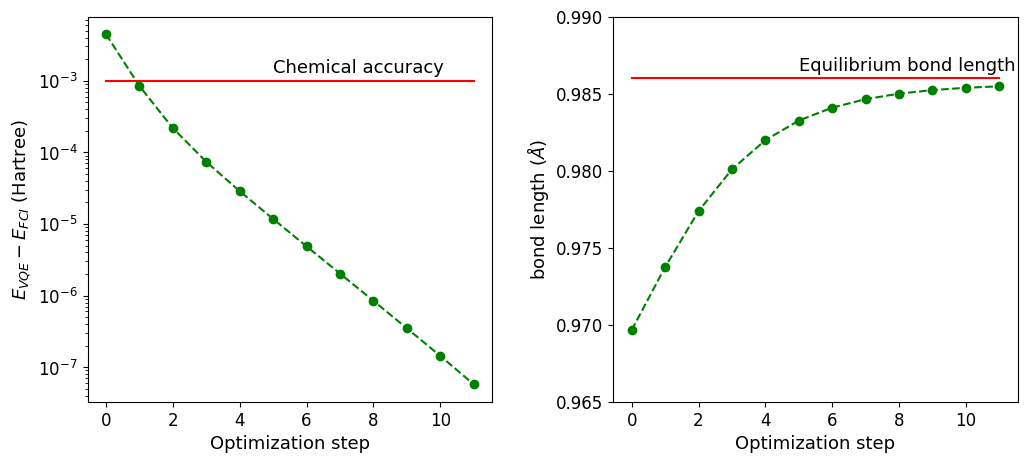

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(12)

# Add energy plot on column 1
E_fci = -1.27443765658
E_vqe = jnp.array(energies)
ax1 = fig.add_subplot(121)
ax1.plot(range(n + 1), E_vqe - E_fci, "go", ls="dashed")
ax1.plot(range(n + 1), jnp.full(n + 1, 0.001), color="red")
ax1.set_xlabel("Optimization step", fontsize=13)
ax1.set_ylabel("$E_{VQE} - E_{FCI}$ (Hartree)", fontsize=13)
ax1.text(5, 0.0013, r"Chemical accuracy", fontsize=13)
plt.yscale("log")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add bond length plot on column 2
d_fci = 0.986
ax2 = fig.add_subplot(122)
ax2.plot(range(n + 1), bond_length, "go", ls="dashed")
ax2.plot(range(n + 1), jnp.full(n + 1, d_fci), color="red")
ax2.set_ylim([0.965, 0.99])
ax2.set_xlabel("Optimization step", fontsize=13)
ax2.set_ylabel("bond length ($\AA$)", fontsize=13)
ax2.text(5, 0.9865, r"Equilibrium bond length", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.subplots_adjust(wspace=0.3)
plt.show()